---

---

# Prediksi Pelaku Nasabah Perbankan Dalam Berlanggan Deposito Menggunakan Model Machine Learning - KNN

----


----

## Data Preparation

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE


In [45]:
data_train = pd.read_csv('training_dataset.csv')
data_train

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,531036,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,...,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,Papua,1
1,999241,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,Sulawesi,0
2,995002,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Papua,0
3,932750,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,Sumatera,1
4,684699,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,Bali,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,680377,32,teknisi,menikah,Diploma,no,yes,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,Kalimantan,0
22912,505429,30,mahasiswa,lajang,Diploma,no,no,no,telephone,sep,...,999,0,nonexistent,-1.1,94.199,-37.5,0.880,4963.6,Bali,0
22913,308952,29,manajer,lajang,SMA,no,yes,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,NTT,0
22914,865813,52,entrepreneur,menikah,Tidak Tamat SD,unknown,yes,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,NTB,0


In [46]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22916 non-null  int64  
 1   usia                          22916 non-null  int64  
 2   pekerjaan                     22916 non-null  object 
 3   status_perkawinan             22916 non-null  object 
 4   pendidikan                    22916 non-null  object 
 5   gagal_bayar_sebelumnya        22916 non-null  object 
 6   pinjaman_rumah                22916 non-null  object 
 7   pinjaman_pribadi              22916 non-null  object 
 8   jenis_kontak                  22916 non-null  object 
 9   bulan_kontak_terakhir         22916 non-null  object 
 10  hari_kontak_terakhir          22916 non-null  object 
 11  jumlah_kontak_kampanye_ini    22916 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22916 non-null  int64  
 13  j

In [47]:
data_train.shape

(22916, 22)

In [48]:
data_train.describe()

,customer_number,usia,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,berlangganan_deposito
count,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000
mean,550930.993193,40.016233,2.561878,962.210377,0.170143,0.077915,93.576541,-40.485717,3.617890,5166.773124,0.114069
std,259909.889175,10.438059,2.794178,187.566774,0.490611,1.576176,0.580586,4.641091,1.737591,72.479698,0.317902
min,100108.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,325755.000000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,553139.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000,0.000000
75%,777157.500000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,999997.000000,98.000000,42.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [49]:
# Mengidentifikasi data duplikat
data_train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22911    False
22912    False
22913    False
22914    False
22915    False
Length: 22916, dtype: bool

In [50]:
# Mengidentifikasi mising values
data_train.isnull().sum()

customer_number                 0
usia                            0
pekerjaan                       0
status_perkawinan               0
pendidikan                      0
gagal_bayar_sebelumnya          0
pinjaman_rumah                  0
pinjaman_pribadi                0
jenis_kontak                    0
bulan_kontak_terakhir           0
hari_kontak_terakhir            0
jumlah_kontak_kampanye_ini      0
hari_sejak_kontak_sebelumnya    0
jumlah_kontak_sebelumnya        0
hasil_kampanye_sebelumnya       0
tingkat_variasi_pekerjaan       0
indeks_harga_konsumen           0
indeks_kepercayaan_konsumen     0
suku_bunga_euribor_3bln         0
jumlah_pekerja                  0
pulau                           0
berlangganan_deposito           0
dtype: int64

### Visualization

- Berlangganan Deposito Categories

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_5672\1013593012.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data_train, x='berlangganan_deposito', palette='viridis')


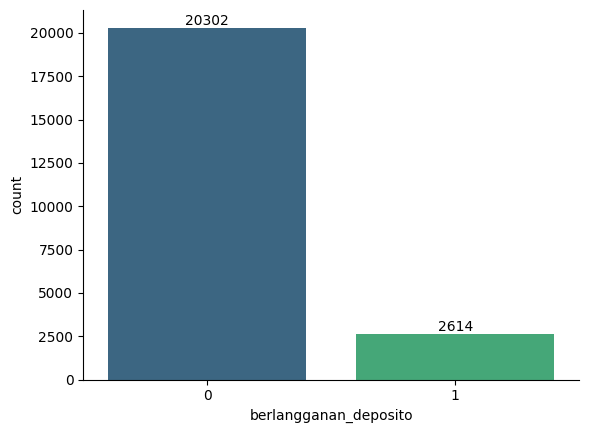

In [51]:
ax = sns.countplot(data_train, x='berlangganan_deposito', palette='viridis')
for i in ax.containers:
    ax.bar_label(i)

sns.despine()

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_5672\2678908919.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data_train, x='hasil_kampanye_sebelumnya', palette='viridis')


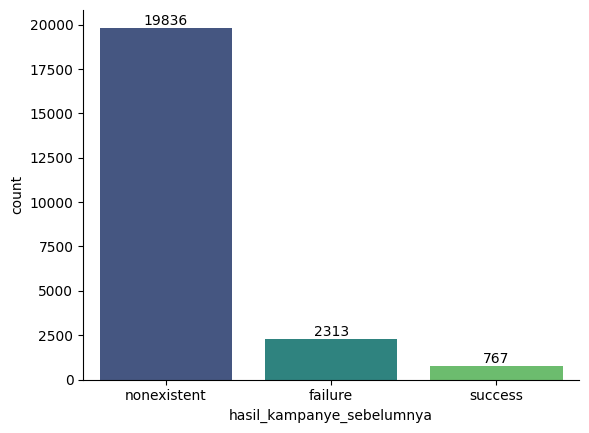

In [52]:
ax = sns.countplot(data_train, x='hasil_kampanye_sebelumnya', palette='viridis')
for i in ax.containers:
    ax.bar_label(i)

sns.despine()

- Visualisasi distribusi usia

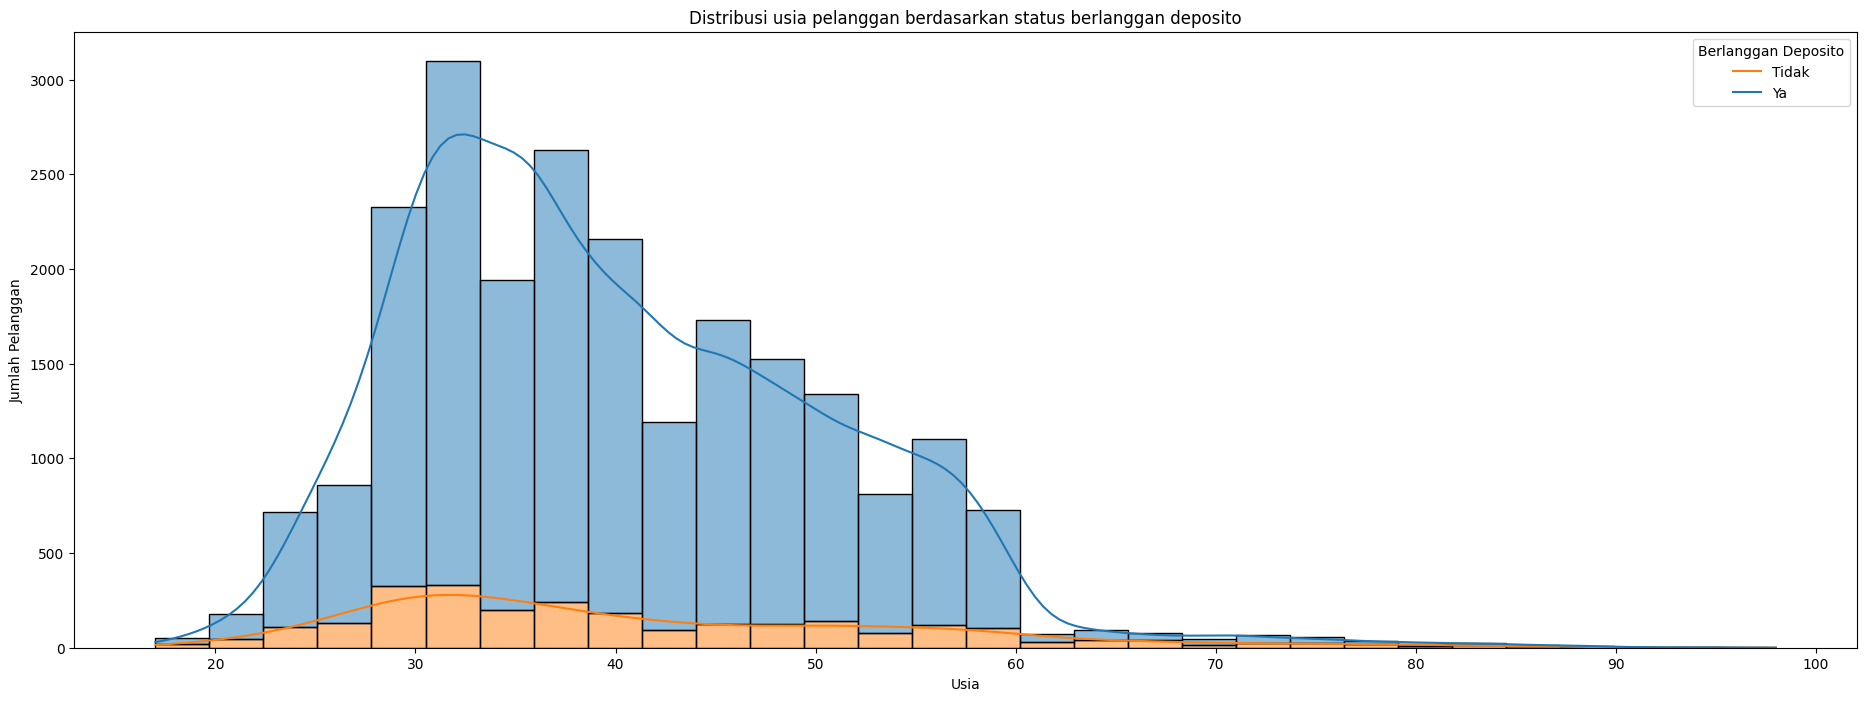

In [53]:
plt.figure(figsize=(23,8))
sns.histplot(data=data_train, x='usia', hue='berlangganan_deposito', multiple='stack', bins=30, kde=True, color='viridis')
plt.title('Distribusi usia pelanggan berdasarkan status berlanggan deposito')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title="Berlanggan Deposito", labels=['Tidak','Ya'])
plt.show()

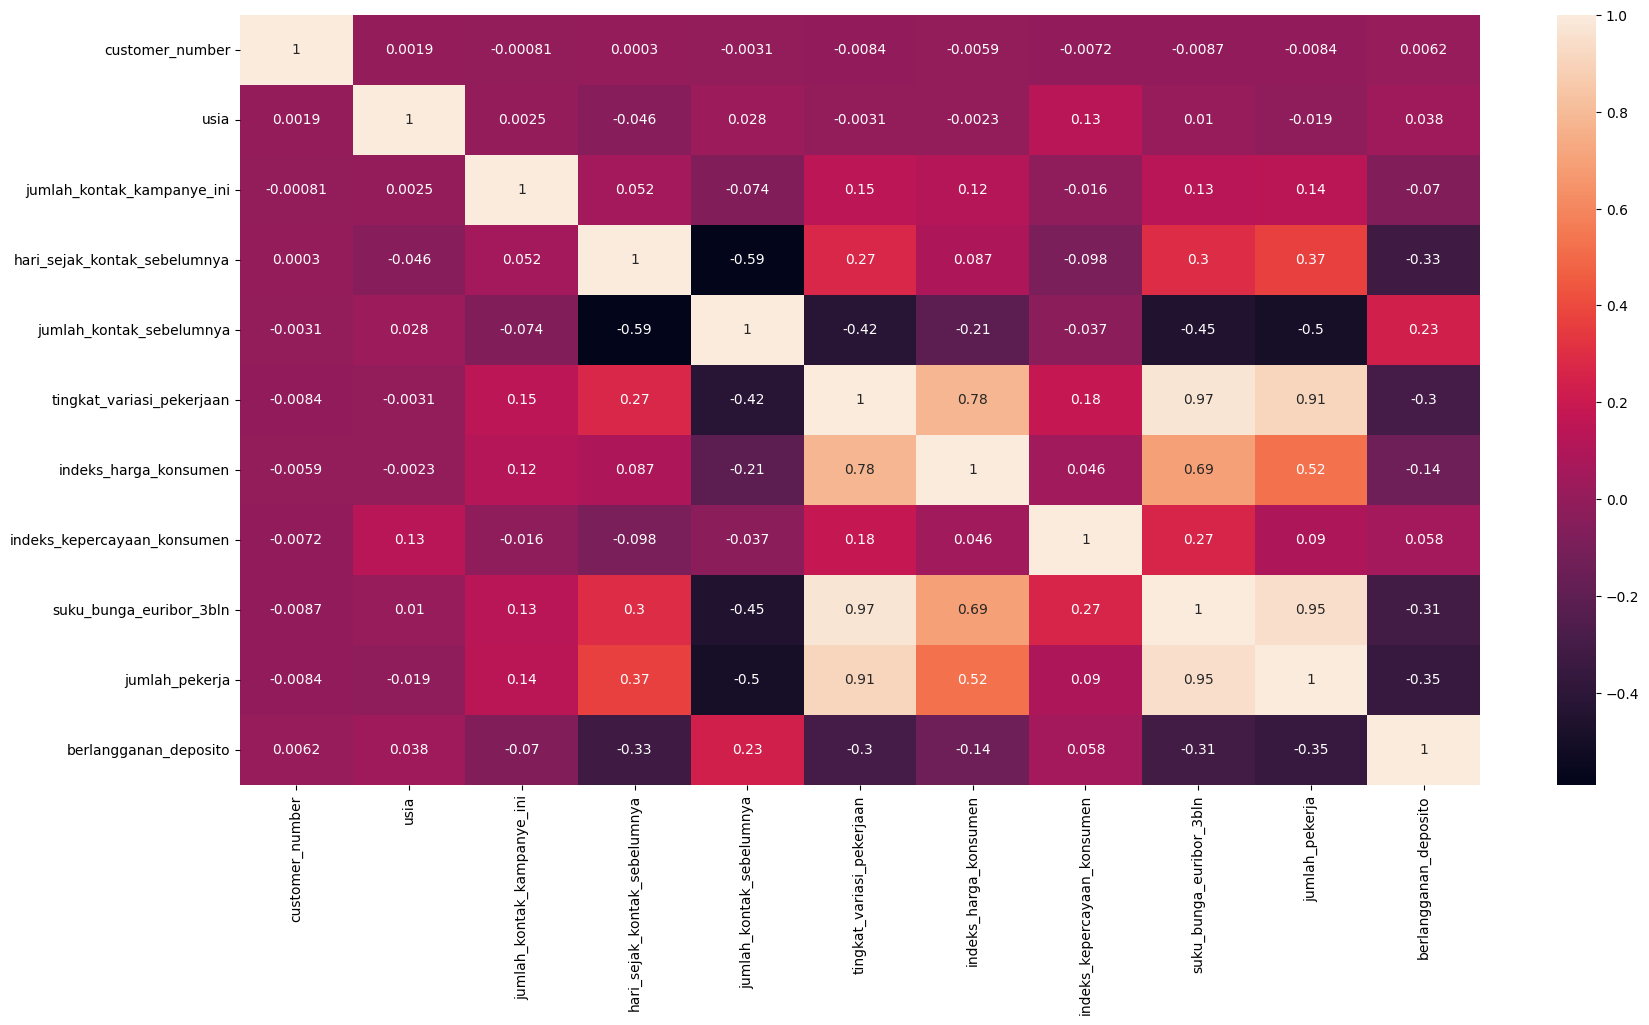

In [54]:
# Visualisasi korelasi antar berbagi variabel dengan dataset
data_train_ = data_train.select_dtypes('number')

plt.figure(figsize=(20,10))
sns.heatmap(data=data_train_.corr(),annot=True)
plt.savefig('corelation.png')

plt.show()

Visualisasi diatas merupakan gambaran korelasi antar beberapa variabel khususnya variabel yang bertipe numerik. Tujuan dari visualisasi koralasi tersebut untuk melihat seberapa kuat variabel saling berinteraksi atau terhubung khususnya untuk variabel target. 

Diatas khususnya untuk variabel target "berlangganan_deposito" menunjukkan beberapa variabel mengarah kekorelasi negatif seperti korelasi paling terhadap variabel "customer_number" dengan nilai 0,0062 ini menunjukkan tidak adanya korelasi terhadap variabel target.

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_5672\4148669283.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data_train, x='tingkat_variasi_pekerjaan', palette='viridis')


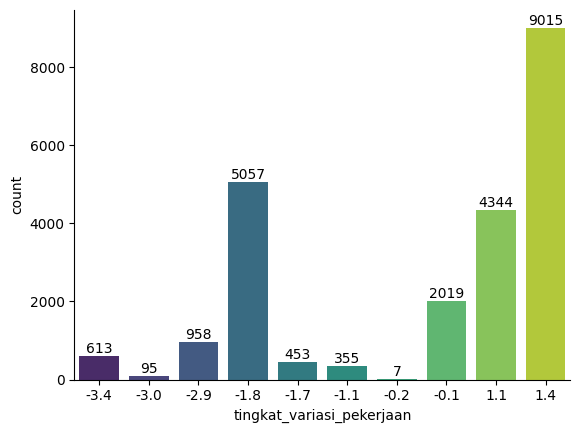

In [55]:
# Data Quality Categories
ax = sns.countplot(data_train, x='tingkat_variasi_pekerjaan', palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)
sns.despine()

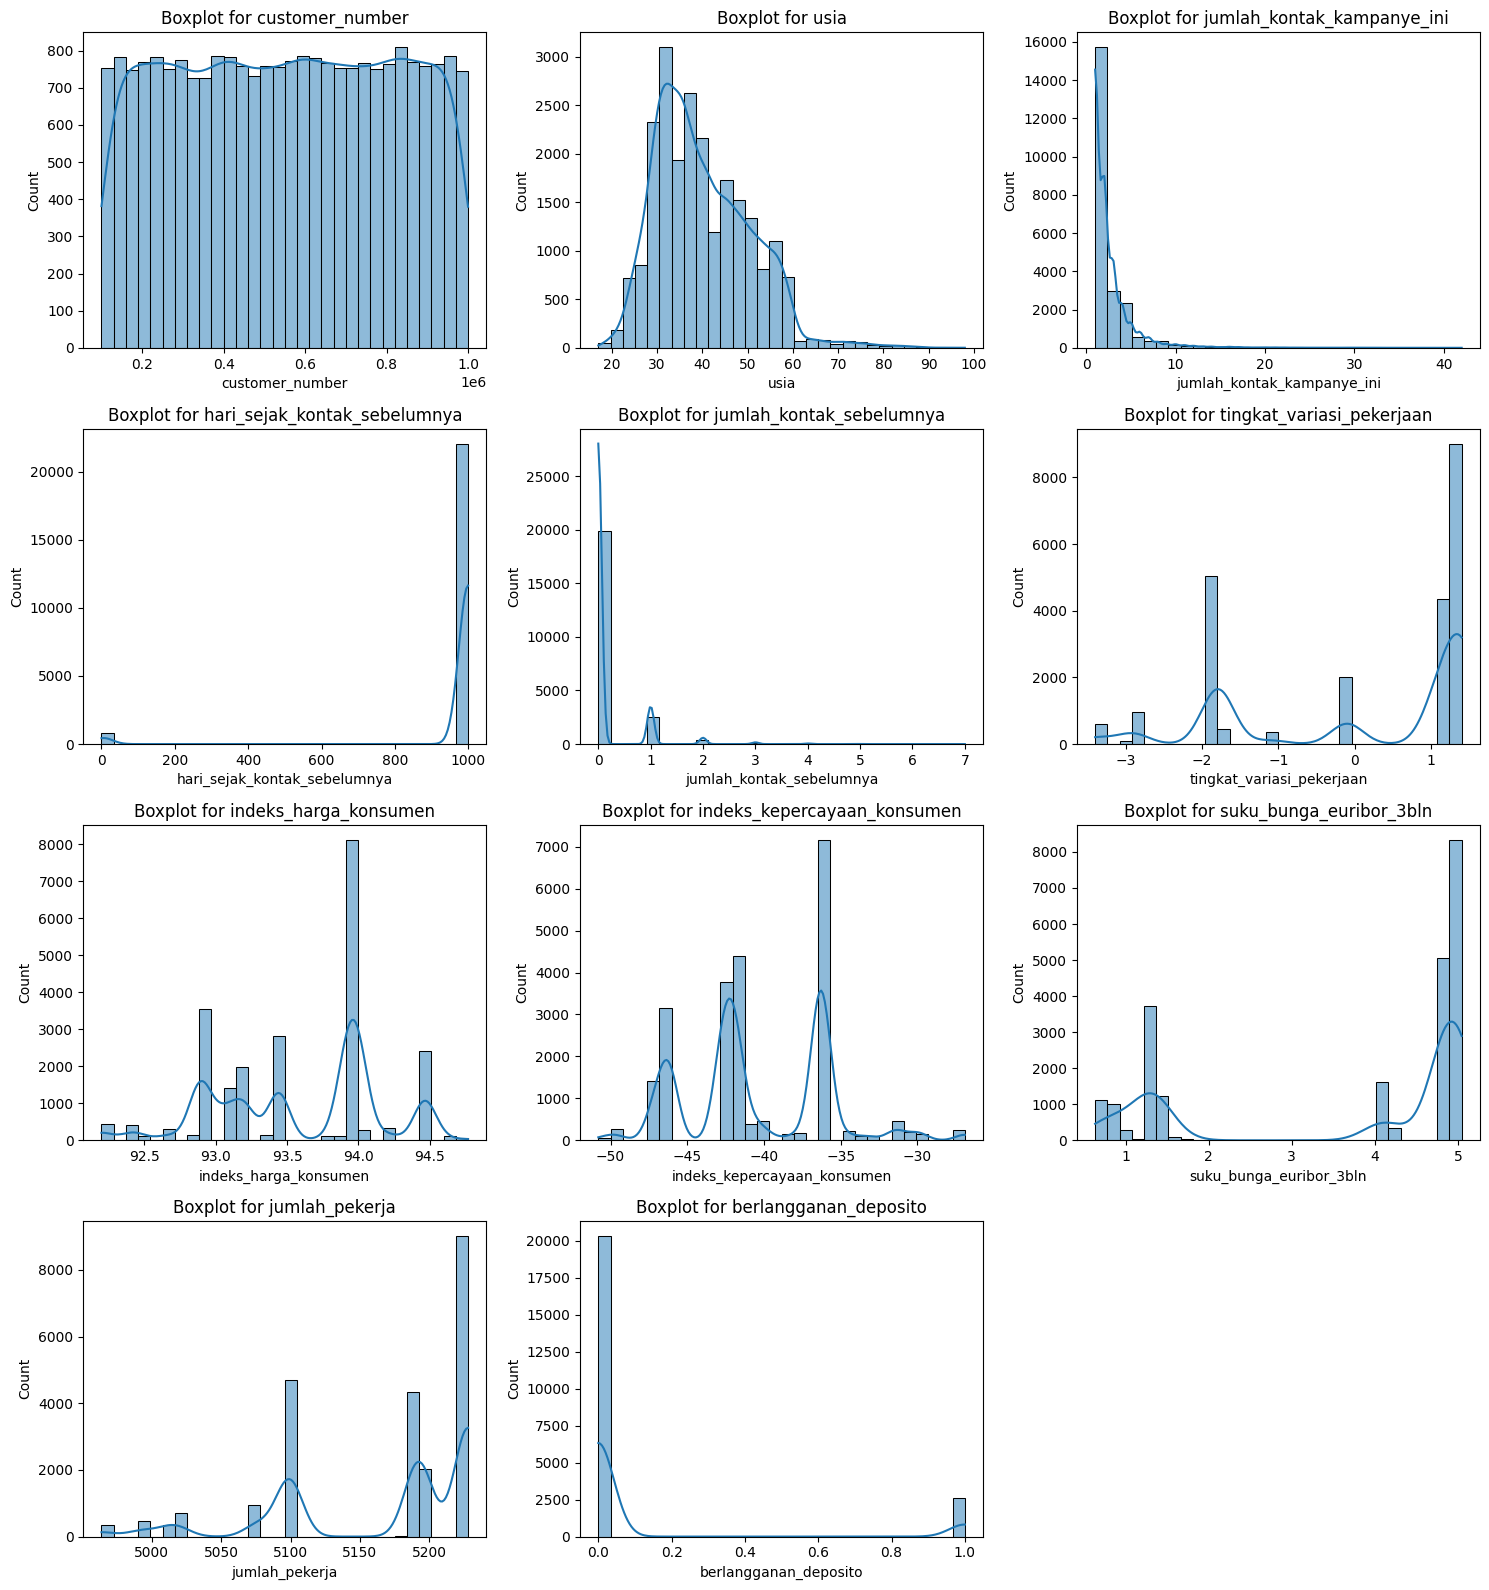

In [56]:
# Visualisai untuk melihat distribusi pada kolom number

numerik = data_train.select_dtypes(include='number').columns

jml_col = len(numerik)
col = 3
baris = (jml_col//col) + (jml_col%col>0)

fig, axs = plt.subplots(baris, col, figsize=(15, baris*4))
axs = axs.flatten()

for idx, col in enumerate(numerik) :
    sns.histplot(data=data_train[col], ax=axs[idx], bins=30, kde=True)
    axs[idx].set_title(f'Boxplot for {col}')


for j in range(idx + 1, len(axs)) :
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

### Analysis Outliers

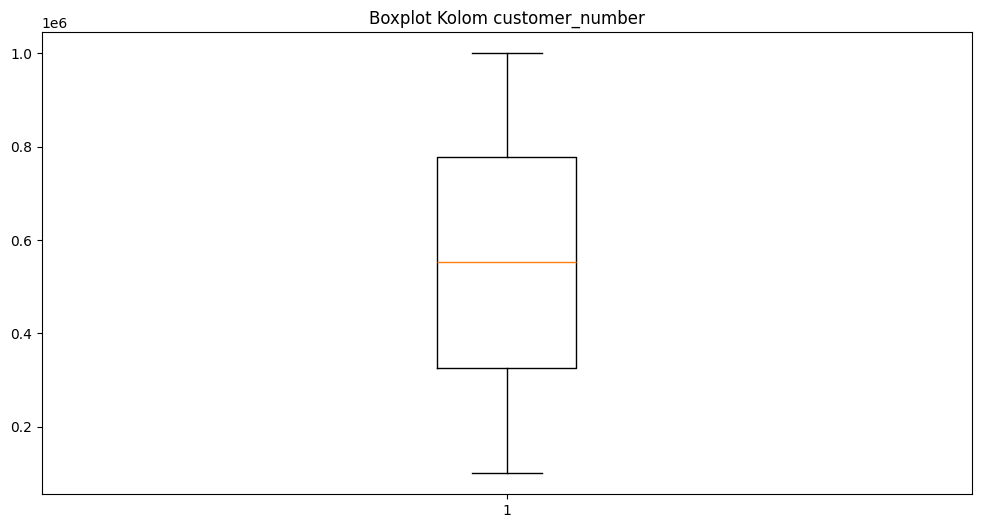

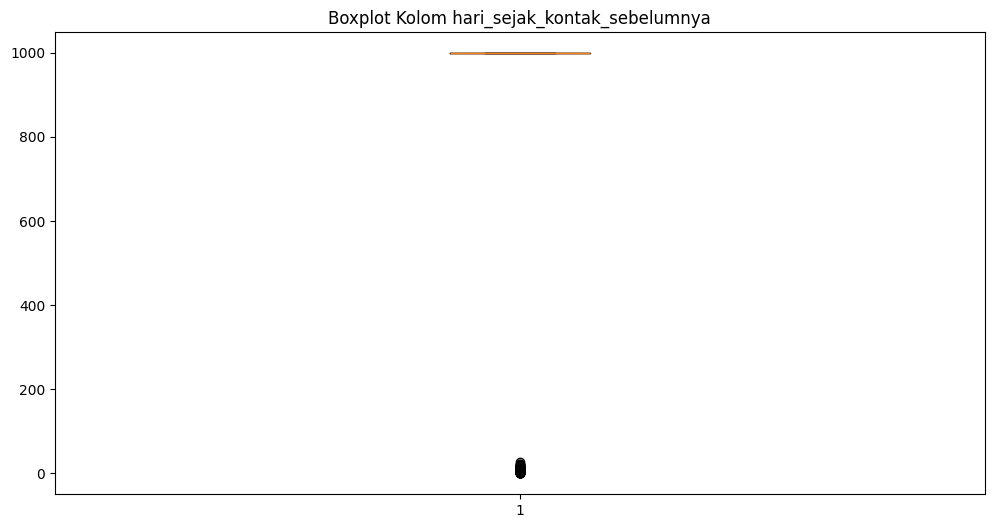

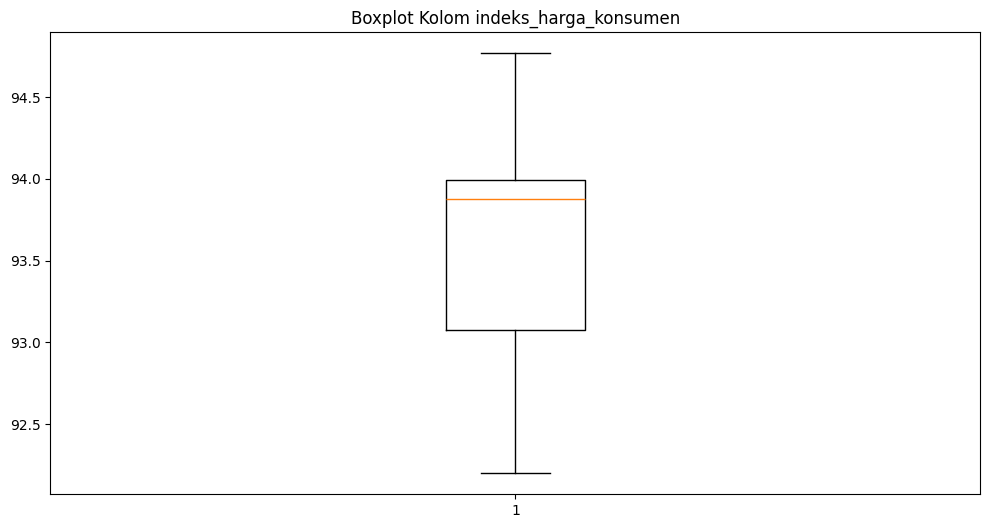

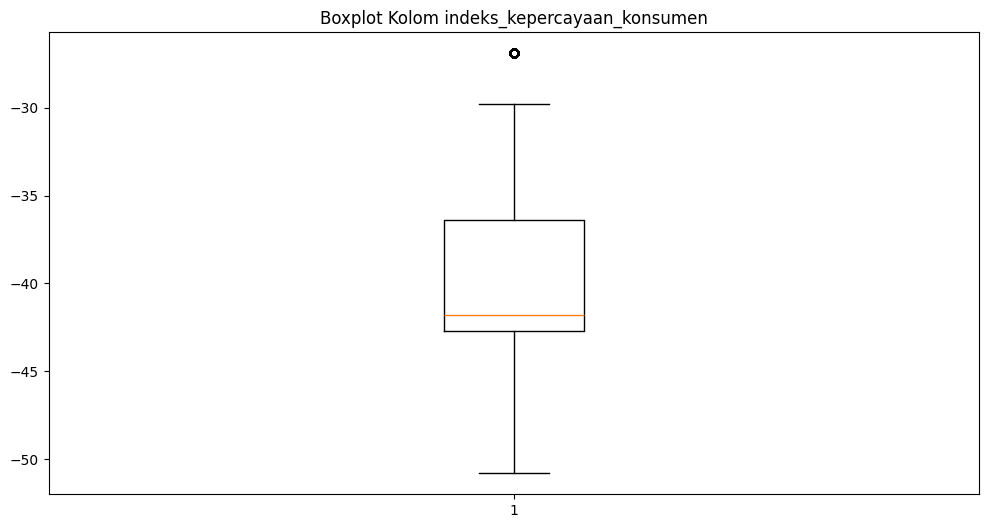

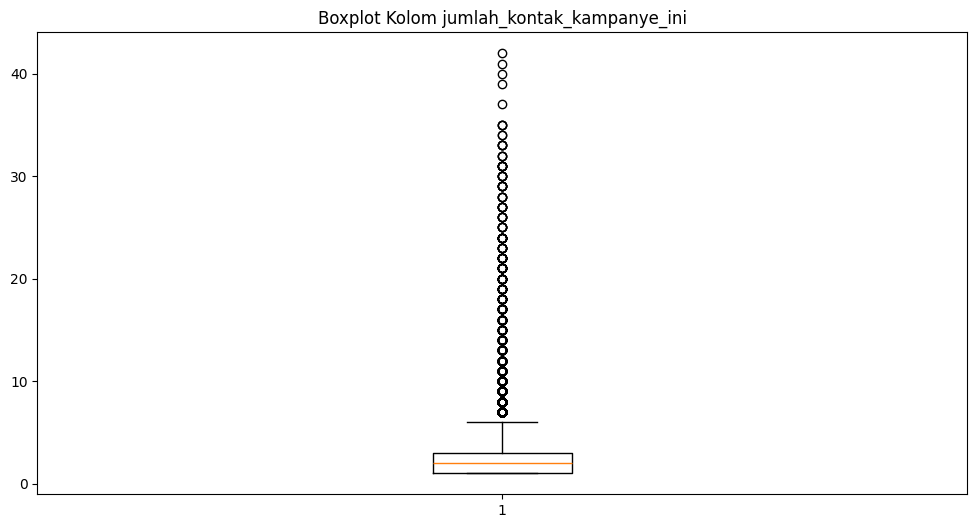

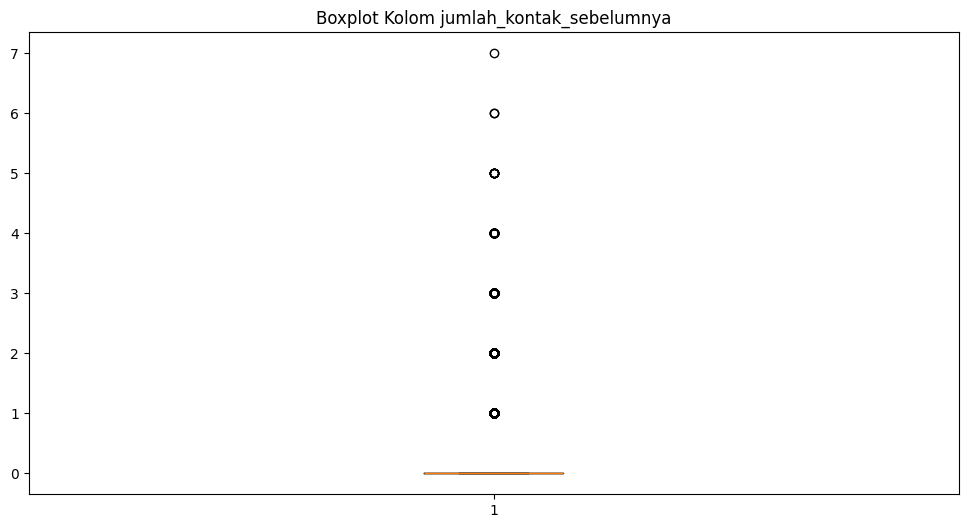

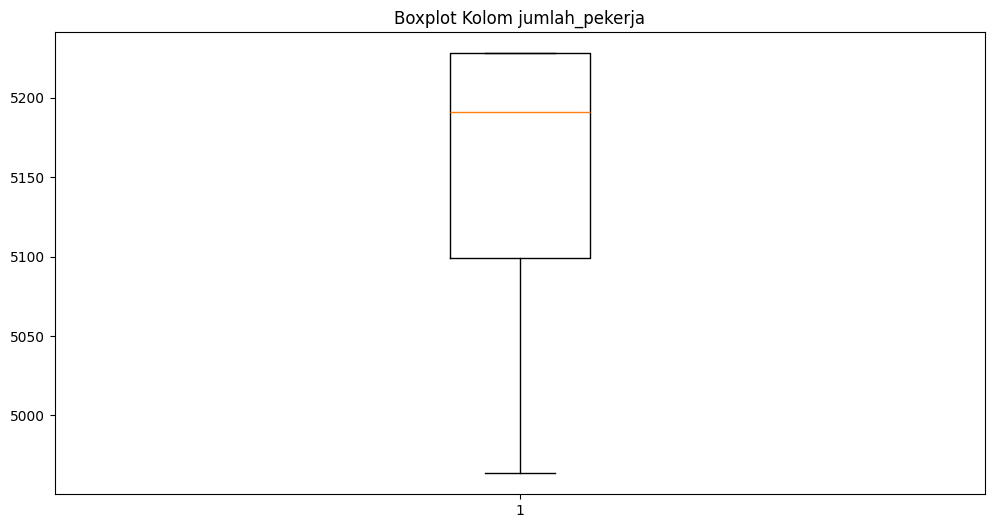

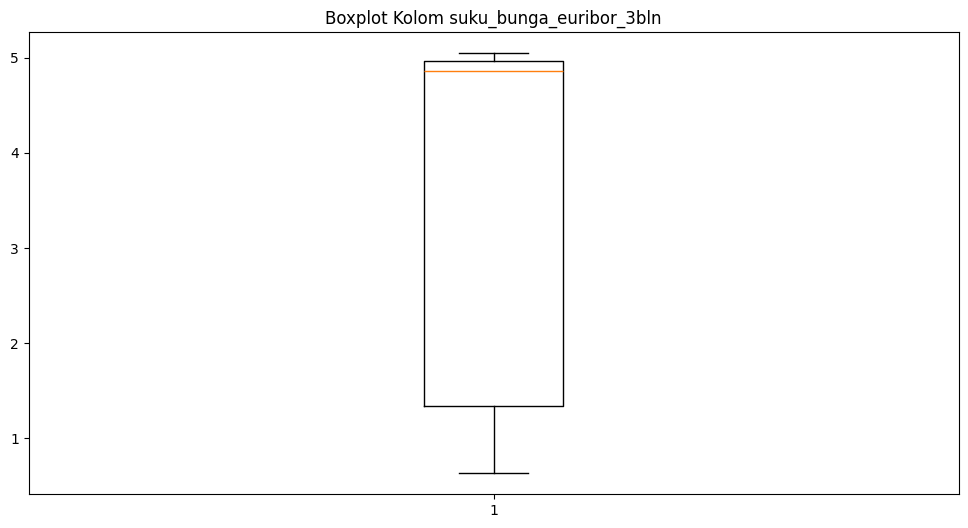

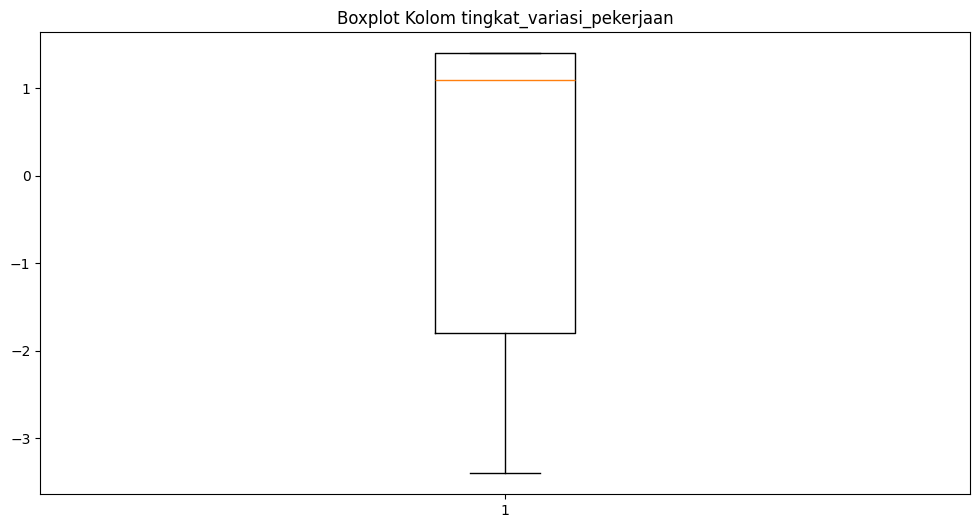

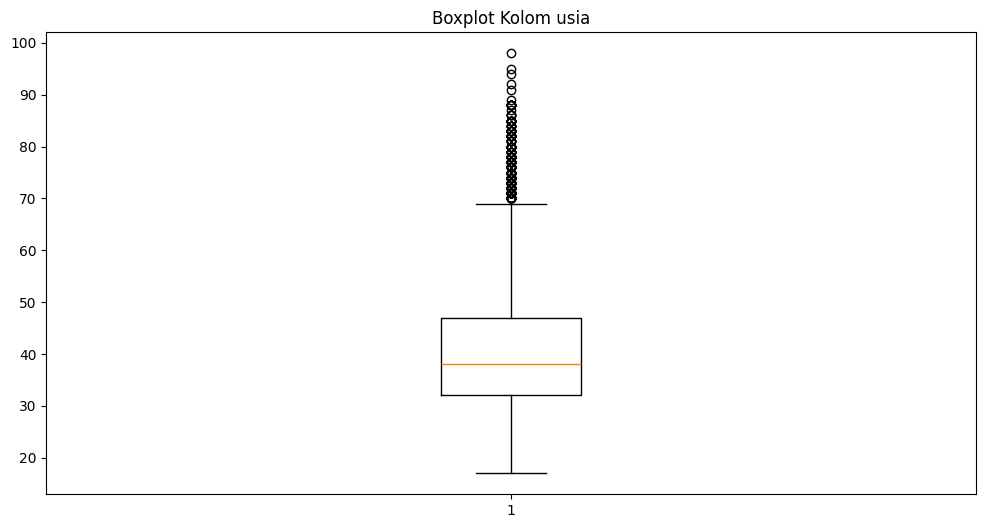

In [57]:
# Mengidentifikasi outliers pada data train
data_col = data_train.select_dtypes(include='number').columns.difference(['berlangganan_deposito'])

for col in data_train[data_col] :
    plt.figure(figsize=(12,6))
    plt.boxplot(data=data_train, x=data_train[col])
    plt.title(f'Boxplot Kolom {col}')
    plt.show( )

Label Encoder

In [58]:
encoder = LabelEncoder()

data_categorikal = data_train.select_dtypes(include='object').columns

for kal in data_categorikal :
    data_train[kal] = data_train[kal].astype(str) # merubah semua nilai menjadi type string
    data_train[kal] = encoder.fit_transform(data_train[kal])


### Splitting Data

In [59]:
# Menghapus kolom kurang relevan
kolom = ['customer_number','pulau','jenis_kontak','bulan_kontak_terakhir','hari_kontak_terakhir', 'jumlah_kontak_kampanye_ini',
         'hari_sejak_kontak_sebelumnya','jumlah_kontak_sebelumnya','hasil_kampanye_sebelumnya']
data_train = data_train.drop(kolom, axis=1)

In [60]:

# Proses membagi data menjadi dua fitur (X dan y)
X = data_train.drop(columns=['berlangganan_deposito'], axis=1)
y = data_train['berlangganan_deposito']

In [61]:
y.value_counts()

berlangganan_deposito
0    20302
1     2614
Name: count, dtype: int64

In [62]:
# Balancing Data - Smote
smote = SMOTE(random_state=42)
X_new, y_new = smote.fit_resample(X,y)

In [63]:
# Membagi data latih 80% dan data uji 20%
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new, test_size=0.2, random_state=69)

## Train Model 

In [64]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Classification Report =                precision    recall  f1-score   support

           0       0.91      0.80      0.85      4053
           1       0.82      0.92      0.87      4068

    accuracy                           0.86      8121
   macro avg       0.87      0.86      0.86      8121
weighted avg       0.87      0.86      0.86      8121



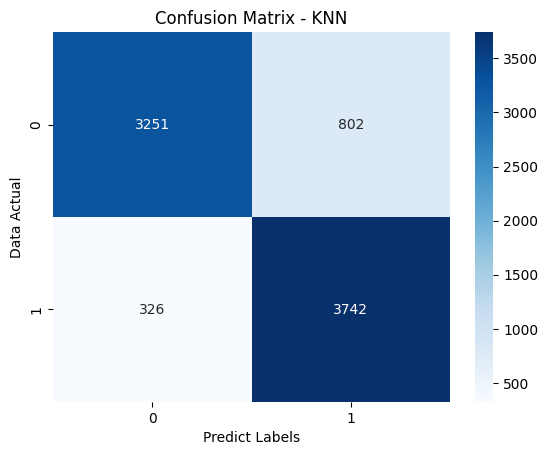

In [65]:
y_pred = knn.predict(X_test)
print('Classification Report = ', classification_report(y_test,y_pred))

# Visualiasi confusion matriks - random forest
cm_rf = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_rf, annot=True,cmap='Blues', fmt='d', cbar='False')
plt.xlabel('Predict Labels')
plt.ylabel('Data Actual')
plt.title('Confusion Matrix - KNN')
plt.savefig('confusion_matriks.png')

## Evalution Model

Feature Scaling

In [66]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [67]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
# Hitung akurasi pada data latih
train_score = knn.score(X_train_scaled, y_train)

print("Akurasi Data Pengujian:", train_score)

Akurasi Data Pengujian: 0.9225440999907644


In [70]:
# Hitung akurasi pada data pengujian
test_score = knn.score(X_test_scaled, y_test)

print("Akurasi Data Pengujian:", test_score)

Akurasi Data Pengujian: 0.8606082994705085


### Tuning Model

0.8606082994705085


1

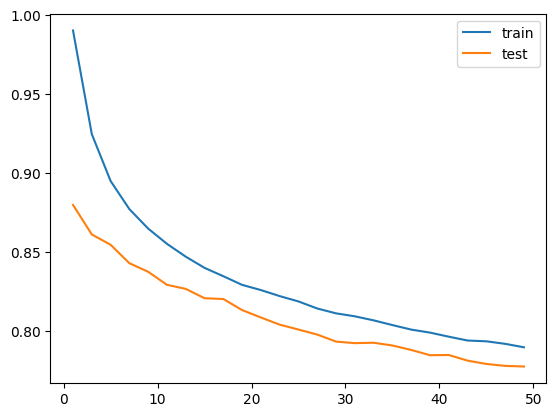

In [71]:
neigbor = range(1,51,2)

train_scores = []
test_scores = []

# Loop over number of neighbors
for k in neigbor:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

plt.plot(neigbor, train_scores, label='train')
plt.plot(neigbor, test_scores, label='test')
plt.legend()

print(np.max(test_score))
neigbor[np.argmax(test_score)]

0.8606082994705085


1

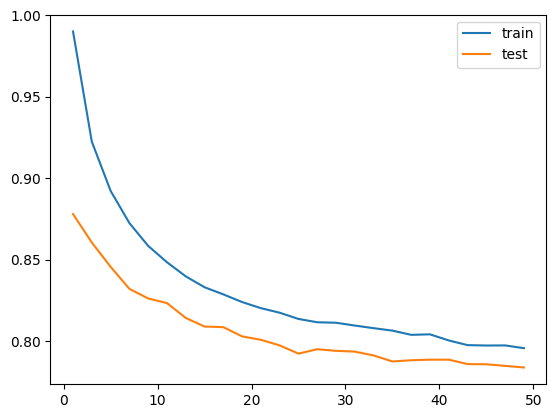

In [72]:
neigbor = range(1,51,2)

train_scores_scaled = []
test_scores_scaled = []

# Loop over number of neighbors
for k in neigbor:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_scores_scaled.append(knn.score(X_train_scaled, y_train))
    test_scores_scaled.append(knn.score(X_test_scaled, y_test))

plt.plot(neigbor, train_scores_scaled, label='train')
plt.plot(neigbor, test_scores_scaled, label='test')
plt.legend()

print(np.max(test_score))
neigbor[np.argmax(test_score)]

---

---


## Test Model

In [73]:
# Membaca file data test
df = pd.read_csv('validation_set.csv')
df

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau
0,445420,35,penyedia jasa,menikah,SMA,no,yes,yes,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,Jawa
1,585604,52,teknisi,lajang,Diploma,unknown,no,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,Papua
2,888824,37,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,Bali
3,816820,51,pengangguran,menikah,Diploma,no,no,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Sumatera
4,542716,45,teknisi,cerai,SMA,no,yes,no,cellular,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,Sumatera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,782072,51,pekerja kasar,menikah,Tidak Tamat SD,no,yes,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,Kalimantan
5725,116371,30,pekerja kasar,menikah,SMP,no,yes,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,Sulawesi
5726,773759,45,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NTB
5727,612330,60,teknisi,menikah,Diploma,unknown,no,no,telephone,jul,...,15,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,Papua


In [74]:
df.head(20)

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau
0,445420,35,penyedia jasa,menikah,SMA,no,yes,yes,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,Jawa
1,585604,52,teknisi,lajang,Diploma,unknown,no,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,Papua
2,888824,37,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,Bali
3,816820,51,pengangguran,menikah,Diploma,no,no,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Sumatera
4,542716,45,teknisi,cerai,SMA,no,yes,no,cellular,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,Sumatera
5,937852,43,pekerja kasar,menikah,Tidak Tamat SD,unknown,yes,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Kalimantan
6,434084,32,sosial media specialis,lajang,SMA,no,no,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,Papua
7,230861,35,pekerja kasar,menikah,SD,unknown,no,no,telephone,jun,...,7,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,Jawa
8,159684,61,pensiunan,cerai,Pendidikan Tinggi,no,yes,no,cellular,apr,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.384,5099.1,Kalimantan
9,274159,31,teknisi,menikah,Diploma,no,no,yes,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,Sumatera


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               5729 non-null   int64  
 1   usia                          5729 non-null   int64  
 2   pekerjaan                     5729 non-null   object 
 3   status_perkawinan             5729 non-null   object 
 4   pendidikan                    5729 non-null   object 
 5   gagal_bayar_sebelumnya        5729 non-null   object 
 6   pinjaman_rumah                5729 non-null   object 
 7   pinjaman_pribadi              5729 non-null   object 
 8   jenis_kontak                  5729 non-null   object 
 9   bulan_kontak_terakhir         5729 non-null   object 
 10  hari_kontak_terakhir          5729 non-null   object 
 11  jumlah_kontak_kampanye_ini    5729 non-null   int64  
 12  hari_sejak_kontak_sebelumnya  5729 non-null   int64  
 13  jum

In [76]:
df.isnull().sum()

customer_number                 0
usia                            0
pekerjaan                       0
status_perkawinan               0
pendidikan                      0
gagal_bayar_sebelumnya          0
pinjaman_rumah                  0
pinjaman_pribadi                0
jenis_kontak                    0
bulan_kontak_terakhir           0
hari_kontak_terakhir            0
jumlah_kontak_kampanye_ini      0
hari_sejak_kontak_sebelumnya    0
jumlah_kontak_sebelumnya        0
hasil_kampanye_sebelumnya       0
tingkat_variasi_pekerjaan       0
indeks_harga_konsumen           0
indeks_kepercayaan_konsumen     0
suku_bunga_euribor_3bln         0
jumlah_pekerja                  0
pulau                           0
dtype: int64

In [77]:
encoder = LabelEncoder()

data_categorikal = df.select_dtypes(include='object').columns

for kal in data_categorikal :
    df[kal] = df[kal].astype(str) # merubah semua nilai menjadi type string
    df[kal] = encoder.fit_transform(df[kal])


In [78]:
# Menghapus kolom kurang relevan
kolom = ['customer_number','pulau','jenis_kontak','bulan_kontak_terakhir','hari_kontak_terakhir', 'jumlah_kontak_kampanye_ini',
         'hari_sejak_kontak_sebelumnya','jumlah_kontak_sebelumnya','hasil_kampanye_sebelumnya']
data_test = df.drop(kolom, axis=1)

In [79]:
data_test.sample(10)

,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja
2278,45,6,2,3,1,2,0,1.1,93.994,-36.4,4.855,5191.0
3599,26,5,1,1,0,0,0,-1.8,92.893,-46.2,1.270,5099.1
3164,31,4,2,2,0,0,2,1.4,93.918,-42.7,4.963,5228.1
2014,39,7,1,3,0,2,0,1.1,93.994,-36.4,4.856,5191.0
720,37,10,1,3,1,0,0,1.4,94.465,-41.8,4.961,5228.1
2585,52,8,1,3,0,0,0,1.1,93.994,-36.4,4.857,5191.0
4247,53,10,2,0,0,0,0,-1.8,92.893,-46.2,1.354,5099.1
4385,37,10,0,0,0,0,0,1.4,93.444,-36.1,4.965,5228.1
2620,38,9,2,1,0,0,0,1.4,93.444,-36.1,4.968,5228.1
5524,40,8,0,3,0,2,0,1.4,94.465,-41.8,4.967,5228.1


In [80]:
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = data_test.select_dtypes(include=['int64', 'float64']).columns
data_test[numeric_columns] = scaler.fit_transform(data_test[numeric_columns])

data_test.head()

,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja
0,0.2125,0.727273,0.666667,0.428571,0.0,1.0,1.0,1.000000,0.669135,0.338912,0.980730,1.000000
1,0.4250,0.909091,0.333333,0.000000,1.0,0.0,0.0,0.937500,0.698753,0.602510,0.958059,0.859735
2,0.2375,0.363636,0.666667,0.571429,1.0,1.0,0.0,0.937500,0.698753,0.602510,0.957153,0.859735
3,0.4125,0.545455,0.666667,0.000000,0.0,0.0,0.0,0.937500,0.698753,0.602510,0.957379,0.859735
4,0.3375,0.909091,0.000000,0.428571,0.0,1.0,0.0,0.333333,0.269680,0.192469,0.157107,0.512287


Proses Prediksi Data Test

In [81]:
pred_test = knn.predict(data_test)
pred_test

c:\Users\Deon Harefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], shape=(5729,))

In [82]:
# Menggabungkan data
df_test = pd.DataFrame(data=df, columns=df.columns)
df_test['berlangganan_deposito'] = pred_test
df_test

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,445420,35,8,2,3,0,2,2,0,3,...,999,0,1,1.4,93.918,-42.7,4.960,5228.1,1,0
1,585604,52,10,1,0,1,0,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.860,5191.0,5,0
2,888824,37,4,2,4,1,2,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0,0
3,816820,51,6,2,0,0,0,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,7,0
4,542716,45,10,0,3,0,2,0,0,6,...,999,1,0,-1.8,92.893,-46.2,1.327,5099.1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,782072,51,4,2,6,0,2,0,1,4,...,999,0,1,1.4,94.465,-41.8,4.961,5228.1,2,0
5725,116371,30,4,2,4,0,2,2,1,6,...,999,0,1,1.1,93.994,-36.4,4.855,5191.0,6,0
5726,773759,45,4,2,4,1,2,0,1,6,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,3,0
5727,612330,60,10,2,0,1,0,0,1,3,...,999,0,1,1.4,93.918,-42.7,4.961,5228.1,5,0


In [83]:
df_test = df_test[['customer_number','berlangganan_deposito']]
df_test

,customer_number,berlangganan_deposito
0,445420,0
1,585604,0
2,888824,0
3,816820,0
4,542716,0
...,...,...
5724,782072,0
5725,116371,0
5726,773759,0
5727,612330,0


In [84]:
df_test['berlangganan_deposito'].value_counts()

berlangganan_deposito
0    4433
1    1296
Name: count, dtype: int64

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_5672\1984739119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df_test, x='berlangganan_deposito', palette='viridis')


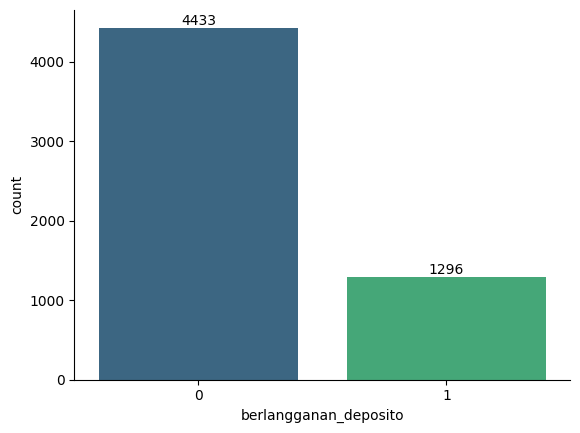

In [85]:
# berlanggana deposito categories
ax = sns.countplot(df_test, x='berlangganan_deposito', palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)
sns.despine()
# plt.savefig('cara2.png')

In [86]:
df_test['berlangganan_deposito'].value_counts()

berlangganan_deposito
0    4433
1    1296
Name: count, dtype: int64

In [87]:
# Menyimpan file dataframe kedalam csv
df_test.to_csv('DCM_DMU_2025_Model_CodersYon.csv',index=False)
